In [1]:
import gym
import sys

sys.path.append("/Users/chriswang/Downloads/sepsis2/rlsepsis234/gym_sepsis")
sys.path.append("/Users/chriswang/Downloads/amir/baselines")
from baselines import deepq
from baselines import bench
from baselines import logger
from baselines.common.atari_wrappers import make_atari
from baselines.common import models
import gym_sepsis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
logger.configure("dqn-log")
env = gym.make("sepsis-vae-v0")
model = deepq.learn(
    env=env,
    prioritized_replay=True,
    checkpoint_path="dqn-ckpt{}".format(time.time()),
    seed=1,
    total_timesteps=5000,
    network=models.mlp(num_hidden=128, num_layers=2),
)

model.save('dqn-vae.model')
env.close()

Logging to dqn-log


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Tensor("z/random_normal:0", shape=(?, 30), dtype=float32)
Tensor("z_1/random_normal:0", shape=(?, 30), dtype=float32)
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.


/Users/chriswang/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/chriswang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | 430      |
| steps                   | 560      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -61.7    |
| steps                   | 1.03e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 300      |
| mean 100 episode reward | -141     |
| steps                   | 1.38e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 400      |
| mean 100 episode reward | 516      |
| steps                   | 1.94e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [3]:
test_data = pd.read_csv("/Users/chriswang/Downloads/sepsis2/rlsepsis234/data/test_state_action_reward_df.csv")


In [4]:
rewards = []
steps = []
actions = []

for i in range(2000):
    if i%100 == 0 and i>0:
        print("Done with %d steps..." % i)
    obs, done = env.reset(), False
    episode_rew = 0
    total_steps = 0
    while not done:
        action = model(obs[None])[0]
        actions.append(action)
        obs, rew, done, _ = env.step(action)
        episode_rew += rew
        total_steps += 1
    rewards.append(episode_rew)
    steps.append(total_steps)

Done with 100 steps...
Done with 200 steps...
Done with 300 steps...
Done with 400 steps...
Done with 500 steps...
Done with 600 steps...
Done with 700 steps...
Done with 800 steps...
Done with 900 steps...
Done with 1000 steps...
Done with 1100 steps...
Done with 1200 steps...
Done with 1300 steps...
Done with 1400 steps...
Done with 1500 steps...
Done with 1600 steps...
Done with 1700 steps...
Done with 1800 steps...
Done with 1900 steps...


In [5]:
steps = np.array(steps) 

Text(0.5, 1.0, 'Learned Policy Episode Length (DQN)')

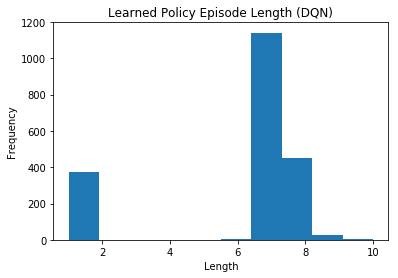

In [6]:
plt.hist(steps)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Length (DQN)")

Text(0.5, 1.0, "Physician's Policy Episode Length")

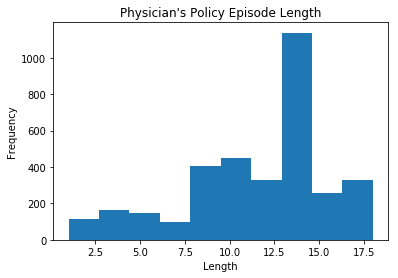

In [7]:

plt.hist(test_data.groupby(['subject_id','hadm_id',  'icustay_id']).count()["BUN"].values)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Length")

Text(0.5, 1.0, "Physician's Policy Episode Rewards")

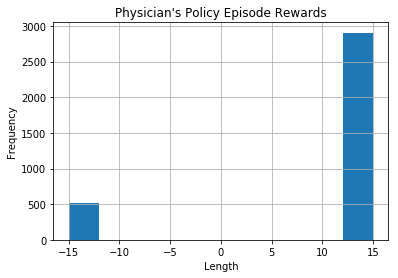

In [8]:
test_data.groupby(['subject_id','hadm_id',  'icustay_id']).sum()["reward"].hist()
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Rewards")

Text(0.5, 1.0, 'Learned Policy Episode Rewards (DQN)')

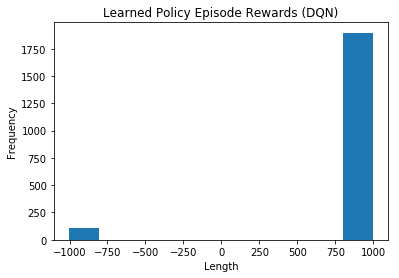

In [9]:
plt.hist(rewards)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Rewards (DQN)")

Text(0.5, 1.0, "Learned Policy's Actions (DQN)")

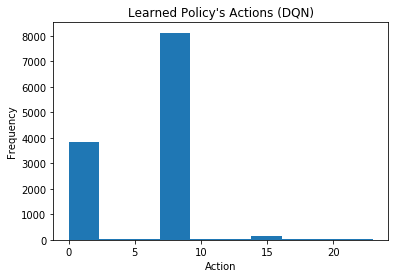

In [10]:
plt.hist(actions)
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Learned Policy's Actions (DQN)")

Text(0.5, 1.0, "Physician Policy's Actions")

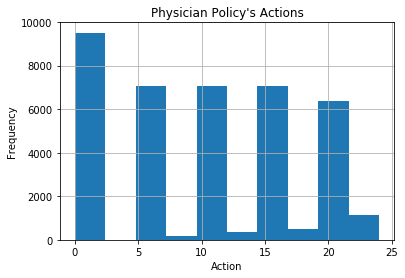

In [11]:
test_data["discrete_action"].hist()
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Physician Policy's Actions")

In [12]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE', 
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']

